Disease Prediction project: 
The aim of this project is to develop an accurate machine learning model that is able to predict one of 42 different diseases based on a set of symptoms. This should help doctors to make diagnoses more efficiently and accurately.

The ultimate goal is to develop a model that:
Has a high degree of accuracy in predicting diseases.
Serves as a decision-making aid for doctors when making a diagnosis.
Potentially contributes to the improvement of patient care.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

train_path = '/Users/caner/Desktop/Data Science/DiseasePrediction/Training.csv' 
test_path = '/Users/caner/Desktop/Data Science/DiseasePrediction/Testing.csv' 

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [32]:
train_df.info()
print("\n" + "-"*50 + "\n")
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB

--------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 43.8+ KB


In [33]:
print(train_df.head(10))

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   
5        0          1                     1                    0          0   
6        1          0                     1                    0          0   
7        1          1                     0                    0          0   
8        1          1                     1                    0          0   
9        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  scurring  \
0       0           0             0        0     

In [34]:
print(test_df.head(10))

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          0                     0                    1          1   
2        0          0                     0                    0          0   
3        1          0                     0                    0          0   
4        1          1                     0                    0          0   
5        0          0                     0                    0          0   
6        0          0                     0                    0          0   
7        0          0                     0                    0          0   
8        0          0                     0                    0          0   
9        0          0                     0                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0               

In [35]:
train_df.tail(20)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
4900,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Hepatitis C,NaN
4901,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,Hepatitis D,NaN
4902,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,Hepatitis E,NaN
4903,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Alcoholic hepatitis,NaN
4904,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,Tuberculosis,NaN
4905,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,Common Cold,NaN
4906,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,Pneumonia,NaN
4907,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Dimorphic hemmorhoids(piles),NaN
4908,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Heart attack,NaN
4909,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Varicose veins,NaN


In [36]:
test_df.tail(20)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
22,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Hepatitis D
23,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Hepatitis E
24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Alcoholic hepatitis
25,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Tuberculosis
26,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Common Cold
27,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pneumonia
28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Dimorphic hemmorhoids(piles)
29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Heart attack
30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Varicose veins
31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hypothyroidism


In [37]:
symptom_frequencies_full = train_df.drop(columns=['prognosis']).sum().sort_values(ascending=False)
symptom_frequencies_full

fatigue                      1932.0
vomiting                     1914.0
high_fever                   1362.0
loss_of_appetite             1152.0
nausea                       1146.0
                              ...  
weakness_of_one_body_side     108.0
ulcers_on_tongue              108.0
foul_smell_of urine           102.0
fluid_overload                  0.0
Unnamed: 133                    0.0
Length: 133, dtype: float64

Frequencies of all 132 symptoms in the training data set, ordered from the most frequent to the least frequent

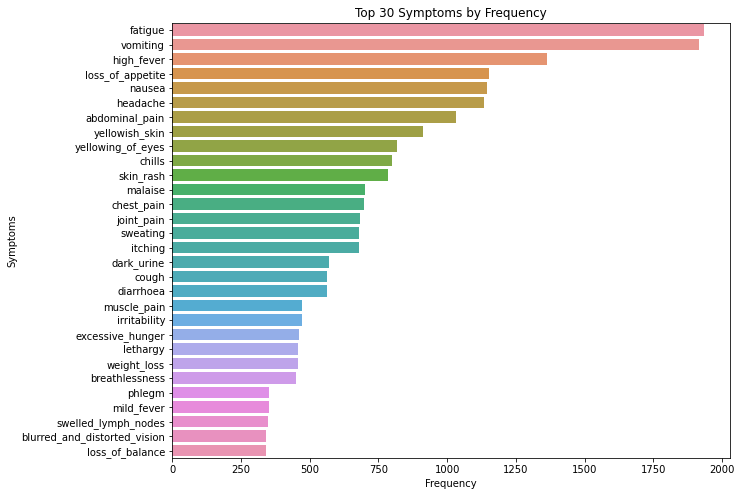

In [38]:
plt.figure(figsize=(10, 8))
top_n = 30
sns.barplot(x=symptom_frequencies.head(top_n), y=symptom_frequencies.head(top_n).index)

plt.title('Top ' + str(top_n) + ' Symptoms by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Symptoms')
plt.show()


Exploratory data analysis (EDA)

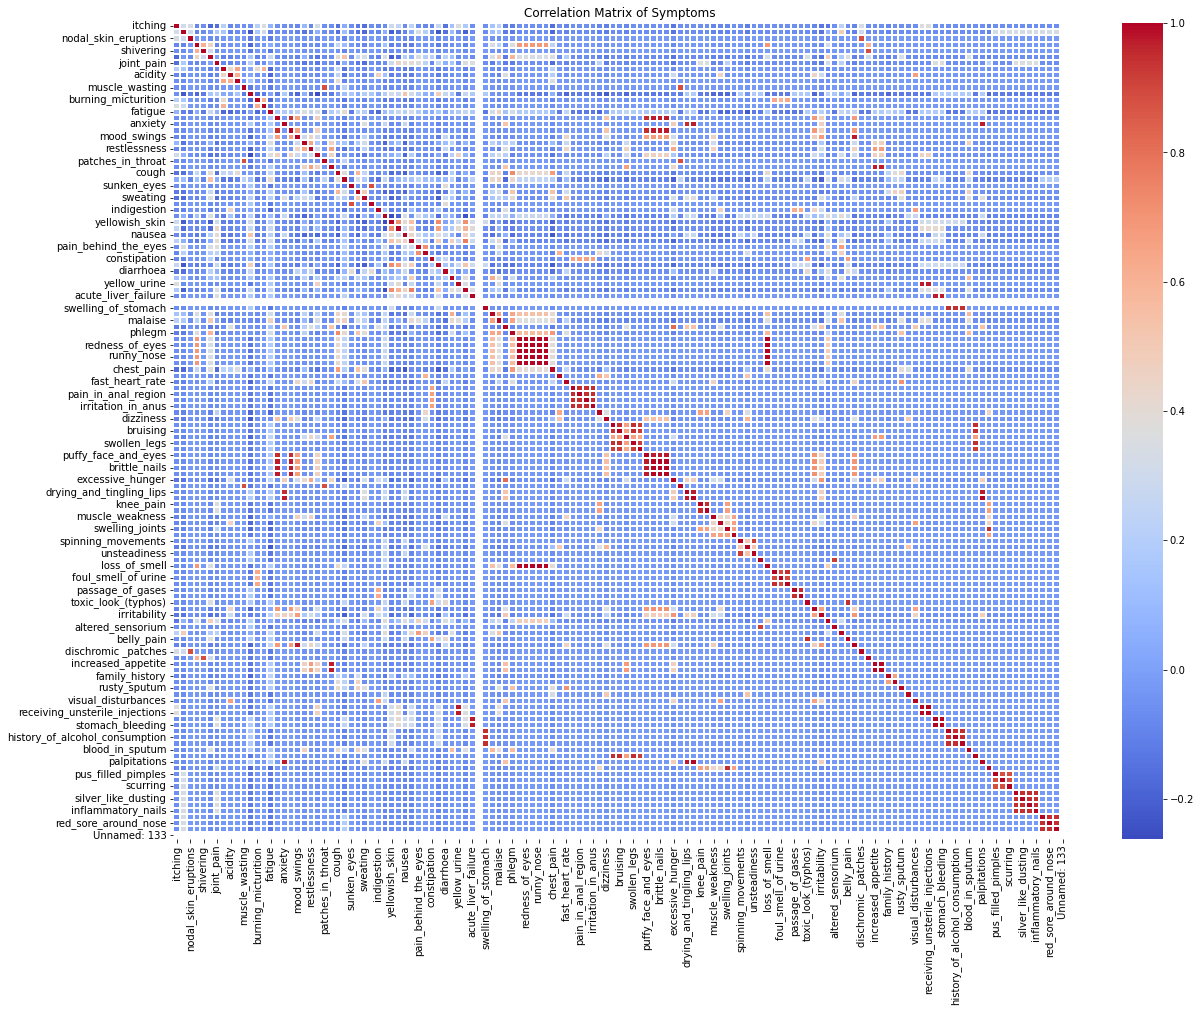

In [48]:
correlation_matrix = train_df.drop(columns=['prognosis']).corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.1, linecolor='white')
plt.title('Correlation Matrix of Symptoms')
plt.show()

In [49]:
corr_matrix_no_diag = correlation_matrix.copy()
np.fill_diagonal(corr_matrix_no_diag.values, 0)

corr_pairs = corr_matrix_no_diag.unstack()
sorted_corr_pairs = corr_pairs.abs().sort_values(ascending=False)
unique_corr_pairs = sorted_corr_pairs[~sorted_corr_pairs.index.duplicated(keep='first')]

unique_corr_pairs.head(20)

throat_irritation               redness_of_eyes                1.0
polyuria                        increased_appetite             1.0
runny_nose                      redness_of_eyes                1.0
                                sinus_pressure                 1.0
                                congestion                     1.0
                                loss_of_smell                  1.0
congestion                      throat_irritation              1.0
                                redness_of_eyes                1.0
                                sinus_pressure                 1.0
                                runny_nose                     1.0
                                loss_of_smell                  1.0
swollen_extremeties             brittle_nails                  1.0
                                enlarged_thyroid               1.0
loss_of_smell                   throat_irritation              1.0
receiving_unsterile_injections  receiving_blood_transfusion   

The analysis of the correlation matrix of all symptoms shows perfect correlations (value 1.0) between certain symptom pairs. 